<span style="color: blue; font-family: Verdana; font-size: 18px; font-weight: bold;">SPRINT 8.1 - VISUALITZACIONES EN PYTHON

<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">DESCRIPCIÓN

Esta práctica permitirá explorar como se pueden utilizar herramientas de visualización avanzadas en Python para interpretar y representar datos de manera efectiva, proporcionando una oportunidad valiosa para mejorar las habilidades análiticas y técnicas.

<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">NIVEL 1:

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que te llame la atención de graficar de cada variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">CONEXIÓN A MySQL:

En primer lugar, defino la función "conectar_bd" que solicita al usuario los datos necesarios para conectarse a una base de datos MySQL y devuelve la variable "conexionEva":

In [5]:
import mysql.connector

def conectar_bd():
    servidor = input('Introduzca el servidor:')
    usuario = input('Introduzca su usuario:')
    contraseña = input('Introduzca su contraseña:')
    base_datos = input('Introduzca la base de datos a importar:')

    conexionEva = mysql.connector.connect(
        host=servidor,
        user=usuario,
        password=contraseña,
        database=base_datos)
    
    return conexionEva

Función importarDB: función que comprueba si la conexión a MySQL es correcta. Si lo es, inicia un bucle para recorrer una a una las tablas dentro de la BBDD y las va importando, guardándolas en el diccionario "dic_tablas" e imprimiendo un  mensaje de confirmación por cada tabla importada. Si la conexión no es correcta imprime mensaje de aviso: "No se pudo establecer conexión con la base de datos".

Si hubiera algún error en el proceso de importación, imprimiría un mensaje de advertencia: 'Error al importar datos'.

Al finalizar, si todo ha funcionado correctamente, imprimirá el mensaje "Importación completada con éxito". 

In [6]:
import pymysql
import pandas as pd

def importarDB(conexionEva): 
    if conexionEva is not None and conexionEva.is_connected(): 
        cursor = conexionEva.cursor() 
        print('Conectado correctamente a la base de datos')

        try:
            cursor.execute('SHOW TABLES') 
            tablas_DB = cursor.fetchall()       
    
            dic_tablas = {}

            for tabla in tablas_DB:
                nombre_tabla = tabla[0]
                cursor.execute(f'SELECT * FROM {nombre_tabla}')
                datos_tabla = cursor.fetchall()
                nombres_columnas = [desc[0] for desc in cursor.description]
                dic_tablas[nombre_tabla] = {'datos': datos_tabla, 'columnas': nombres_columnas}
                    
                print('Datos importados de la tabla:', nombre_tabla)
            
            print('Importación completada con éxito')
            return dic_tablas


        except:
            print('Error al importar datos') 
           
    else:
        print('No se pudo establecer conexión con la base de datos')

Función cerrar_conexión que cierra la conexión e imprime mensaje de confirmación.

In [7]:
def cerrar_conexion(conexionEva):
    if conexionEva.is_connected():
        conexionEva.close()
        print('Conexión cerrada')

Función principal: contiene las 3 funciones auxiliares y las ejecuta en orden: pide datos de conexion, establece conexion, importa tablas a diccionario y cierra la conexión.

In [8]:
def main_cargar_BBDD():
    conexionEva = conectar_bd()
    if conexionEva:
        dic_tablas = importarDB(conexionEva)
        cerrar_conexion(conexionEva)
        return dic_tablas
    else:
        print('No se pudo establecer la conexión con la base de datos')
        return None

dic_tablas = main_cargar_BBDD()

Conectado correctamente a la base de datos
Datos importados de la tabla: by_product
Datos importados de la tabla: companies
Datos importados de la tabla: credit_cards
Datos importados de la tabla: new_transactions
Datos importados de la tabla: products
Datos importados de la tabla: total_users
Datos importados de la tabla: transactions
Datos importados de la tabla: users_ca
Datos importados de la tabla: users_uk
Datos importados de la tabla: users_usa
Importación completada con éxito
Conexión cerrada


Una vez cargado el diccionario, creo una nueva función "crear_dataframe" que transforma las tablas en dataframes de pandas. 

Transformo las tablas "transactions", "companies" y "products" en dataframes. Estas serán las 3 tablas principales con las que realizaré las visualizaciones. En cada ejercicio, realizaré las transformaciones que sean necesarias.

In [9]:
import pandas as pd

def crear_dataframe(dic_tablas, nombre_tabla='transactions'):
    if nombre_tabla in dic_tablas:
        datos = dic_tablas[nombre_tabla]['datos']
        columnas = dic_tablas[nombre_tabla]['columnas']
        
        transactions_DF = pd.DataFrame(datos, columns=columnas)
        print(f"DataFrame de la tabla '{nombre_tabla}' creado con éxito.")
        return transactions_DF
    else:
        print(f"La tabla '{nombre_tabla}' no se encuentra en el diccionario.")
        return None 
    
transactions_DF = crear_dataframe(dic_tablas, nombre_tabla='transactions')

transactions_DF.head(3)

DataFrame de la tabla 'transactions' creado con éxito.


,id,credit_card_id,business_id,Fecha,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500


In [10]:
products_DF = crear_dataframe(dic_tablas, nombre_tabla='products')

products_DF.head(3)

DataFrame de la tabla 'products' creado con éxito.


,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.00,WH-4
1,2,Tarly Stark,9.24,#919191,2.00,WH-3
2,3,duel tourney Lannister,171.13,#d8d8d8,1.50,WH-2


In [11]:
companies_DF = crear_dataframe(dic_tablas, nombre_tabla='companies')

companies_DF.head(3)

DataFrame de la tabla 'companies' creado con éxito.


,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars


<span style="color: blue; font-family: Verdana; font-size: 18px; font-weight: bold;">Ejercicio 1 - Nivel 1

Una variable numérica.


<span style="color: skyblue; font-family: Verdana; font-size: 16px">Variable escogida:

- amount: de la tabla "transactions" contiene los importes de todos los registros de la tabla


<span style="color: skyblue; font-family: Verdana; font-size: 16px">Transformaciones:

1. Cambiar el formato a float
2. Renombrar columna para mejor legibilidad

In [12]:
transactions_DF['amount'] = transactions_DF['amount'].astype(float)

transactions_DF.rename(columns={'amount':'Importe'}, inplace=True)

transactions_DF.head(3)

,id,credit_card_id,business_id,Fecha,Importe,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500


<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">Visualización e interpretación del gráfico

He escogido un histograma de seaborn para ver como se distribuyen los importes de la variable numérica "transactions_amount". En el eje "y" se observa la frecuencia de las transacciones en cada rango de importe y en el "x" las transacciones agrupadas en intervalos de importe. La mayor cantidad de transacciones se concentra en los rangos más bajos (0-100$) así como en el rango entre 400-450$ aproximadamente. La línea roja discontinua muestra el importe promedio de todas las transacciones que se situa en los 250$ aproximadamente.

El importe medio de las transacciones es: 256.74


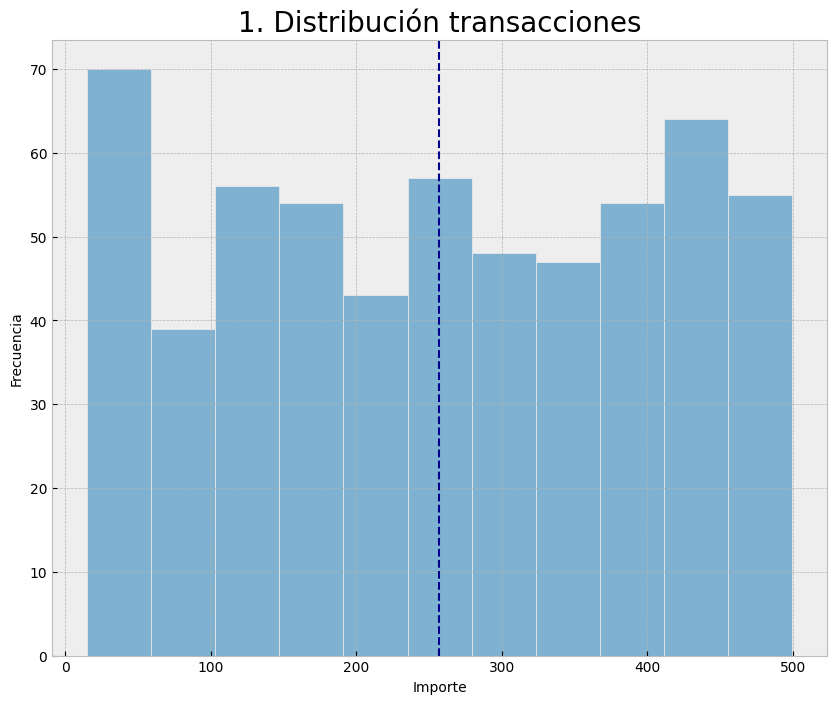

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,8))

media = round(np.mean(transactions_DF['Importe']),2)
print('El importe medio de las transacciones es:',media)

sns.histplot(transactions_DF['Importe'],
             alpha=.6)
        
plt.title('1. Distribución transacciones', fontsize= 20)
plt.xlabel('Importe', size=10)
plt.ylabel('Frecuencia', size=10)
plt.axvline(media, color='darkblue', linestyle='dashed', linewidth=1.5, label='Media')

plt.show()

<span style="color: blue; font-family: Verdana; font-size: 18px; font-weight: bold;">Ejercicio 2 - Nivel 1

Dos variables numéricas.

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Variables escogidas:

- price: contiene el precio de cada uno de los productos de la tabla "products"
- weight: contiene el peso de los productos.


<span style="color: skyblue; font-family: Verdana; font-size: 16px">Transformaciones:

1. Cambiar el formato a float

In [14]:
products_DF['price'] = products_DF['price'].astype(float)
products_DF['weight'] = products_DF['weight'].astype(float)

products_DF.head(3)

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,171.13,#d8d8d8,1.5,WH-2


<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">Visualización e interpretación del gráfico

En este caso, he escogido un gráfico de dispersión de seaborn donde se pueden ver las variables numéricas peso y precio de los 100 productos de "products_DF". Calculo también el coeficiente de correlación de Pearson ya que me interesa medir la relación lineal entre las dos variables. ¿Se puede decir que a más peso del producto más elevado es su precio de venta?

En el eje "x" aparecen los pesos de los productos y en el "y" su precio.

Cada punto azul representa un producto en la intersección de ambas variables. Los datos están muy dispersos dentro del gráfico sin mostrar patrón o tendencia alguna.

Para el cáculo de la correación, he usado el método Tau de Kendall ya que los datos son poco homogéneos. El es resultado de 0.08 lo cuál indica una correlación positiva muy baja o casi nula entre ambas variables y está representada por una línea roja discontinua en el gráfico. El área coloreada alrededor de línea roja representa el intervalo de confianza, al ser ancha, indica que hay una alta incertidumbre en la predicción del precio de un producto basándose únicamente en su peso.

La correlación entre las variables peso y precio es: 0.08


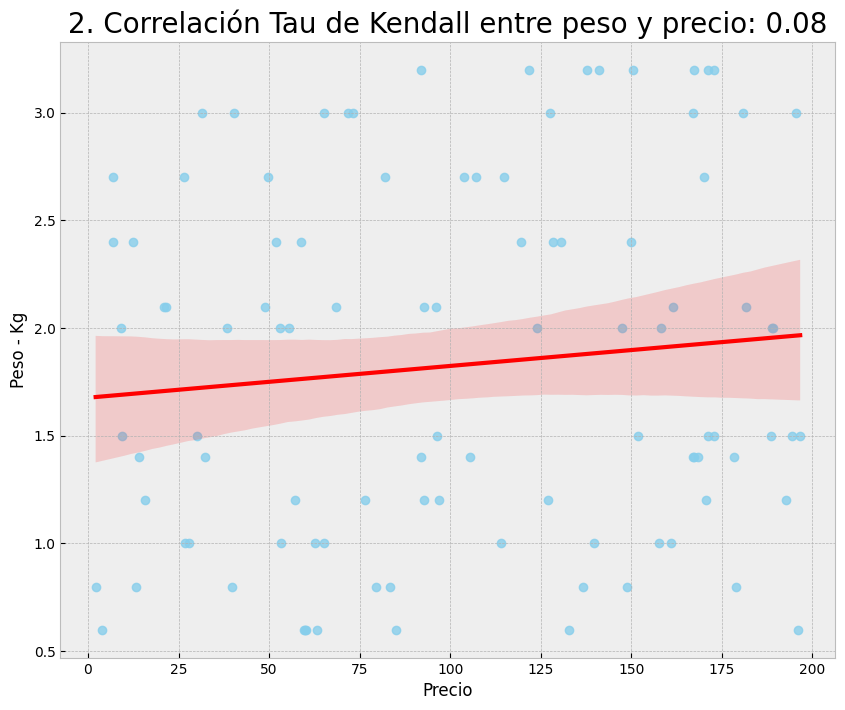

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_peso_precio = round(products_DF['price'].corr(products_DF['weight'], method='kendall'), 2)

print('La correlación entre las variables peso y precio es:',corr_peso_precio)

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x='price',
            y='weight',
            data=products_DF,
            scatter_kws={'color': 'skyblue'},
            line_kws={'color': 'red'})

plt.title(f'2. Correlación Tau de Kendall entre peso y precio: {corr_peso_precio}',fontsize= 20)
plt.xlabel('Precio')
plt.ylabel('Peso - Kg')
plt.show()

<span style="color: blue; font-family: Verdana; font-size: 18px; font-weight: bold;">Ejercicio 3 - Nivel 1

Una variable categórica.

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Variable escogida:

- País: de la tabla "companies" contiene el número de veces que aparecen los paises en la dataframe original, o lo que es lo mismo, cuantas empresas hay en cada país


<span style="color: skyblue; font-family: Verdana; font-size: 16px">Transformaciones:

1. Renombrar columna para mejor legibilidad
2. Creo una nueva dataframe con la variable categorica "country_count" a partir de la dataframe "companies_DF" 

In [16]:
companies_DF.rename(columns={'company_id': 'Empresa', 'country':'País'}, inplace=True)

companies_DF.head(3)

,Empresa,company_name,phone,email,País,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars


In [17]:
country_count = pd.DataFrame(companies_DF['País'].value_counts().reset_index())

country_count

,País,count
0,Sweden,11
1,Netherlands,10
2,United States,9
3,United Kingdom,9
4,Italy,9
5,Germany,8
6,Belgium,8
7,Norway,7
8,Australia,6
9,New Zealand,6


<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">Visualización e interpretación del gráfico

Para esta visualización, he realizado un gráfico circular de matplotlib para visualizar el número de empresas ubicadas en cada país.

El gráfico muestra el recuento de empresas por país, destacando a Suecia como el país con más empresas con un 11% del total, seguido por US, UK, Italia y Holanda con un 9-10% de empresas ubicadas en cada país. El resto de países cuentan con un número similar de empresas, mientras que España y China tienen la menor representación con un escaso 1 y 2% respectivamente.

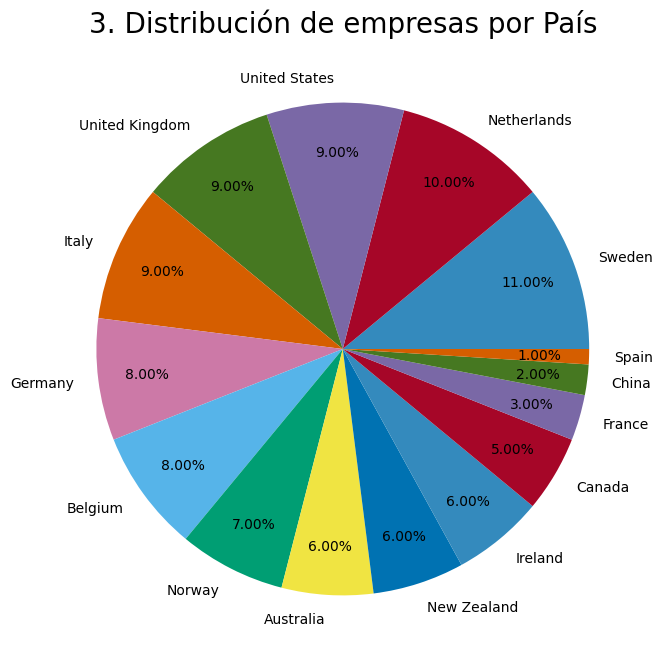

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.pie(x=country_count['count'], 
        labels=country_count['País'], 
        autopct='%.2f%%', 
        pctdistance=0.8, 
        labeldistance=1.1)

plt.title('3. Distribución de empresas por País', fontsize=20)

plt.show()


<span style="color: blue; font-family: Verdana; font-size: 18px; font-weight: bold;">Ejercicio 4 - Nivel 1

Una variable categórica y una numérica.

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Variable escogida:

- numérica "amount": contiene el importe de cada transacción
- categórica "country" : contiene el país donde está ubicada la empresa que ha realizado cada transacción

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Transformaciones:

1. Renombrar columna para mejor legibilidad
2. Creo la nueva dataframe "transactions-companies" unificando las tablas transactions y companies. Tipo de unión "inner" que incluye en la nueva dataframe todos los registros que sean comunes en ambas tablas. La columna clave para unirlas es "Empresa"
3. Una vez unificadas las dos tablas, creo el dataframe final de contendrá las dos variables a graficar: suma del importe total de transacciones por país y ordenado de mayor a menor.

In [19]:
transactions_DF.rename(columns={'business_id': 'Empresa'}, inplace=True)
companies_DF.rename(columns={'company_id': 'Empresa'}, inplace=True)

In [20]:
transactions_companies = pd.merge(companies_DF, transactions_DF, on='Empresa', how='inner')

transactions_companies.head(3)

,Empresa,company_name,phone,email,País,website,id,credit_card_id,Fecha,Importe,declined,product_ids,user_id,lat,longitude
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,2021-07-07,293.57,0,59,275,83.7839,-178.8600
1,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site,EA2C3281-C9C1-A387-44F8-729FB4B51C76,CcU-2938,2021-05-09,119.36,1,"59, 79, 37, 73",275,20.2004,-116.8400
2,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,CcU-2945,2022-02-04,312.50,0,"71, 41",275,58.9367,-76.8171


In [21]:
total_pais = pd.DataFrame(transactions_companies.groupby('País')['Importe'].sum().sort_values(ascending=False).reset_index())

total_pais.head(3)

,País,Importe
0,Germany,28815.98
1,United Kingdom,27073.17
2,Sweden,20588.59


<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">Visualización e interpretación del gráfico

Para visualizar estas dos variables (una categórica y otra numérica), he escogido un gráfico de barras de seaborn. En el eje Y se pueden ver los importes en intervalos de 5.000$ y en el eje X los países.

El gráfico muestra los importes totales generados por país, donde Alemania lidera con el mayor importe, seguido por Reino Unido y Suecia. Estos tres países tienen importes significativamente más altos en comparación con el resto. Los países con importes más bajos incluyen China y España, que están al final del eje x.

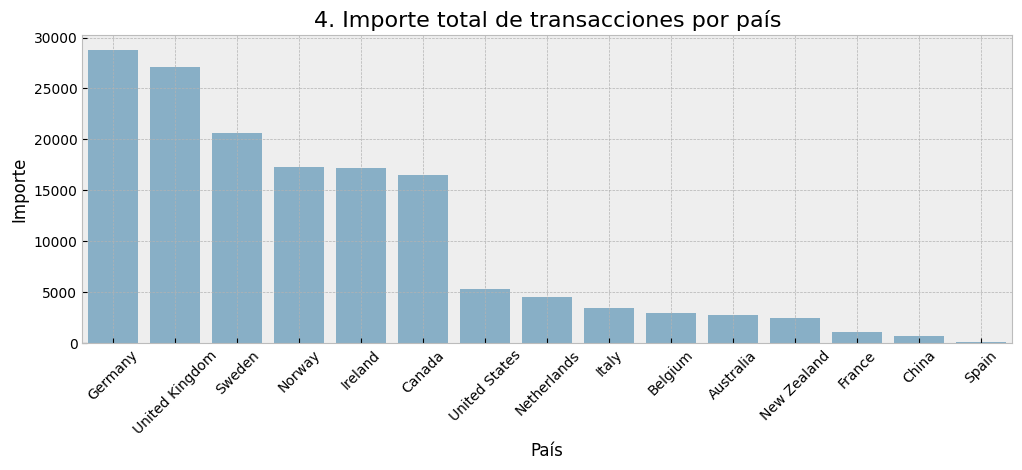

In [31]:
plt.style.use('bmh')
fig,ax = plt.subplots(figsize=(12,4))

g = sns.barplot(data=total_pais, 
            x='País', 
            y='Importe',
            alpha=.6)
          
plt.title('4. Importe total de transacciones por país', fontsize = 16)
plt.xlabel('País')
plt.ylabel('Importe')  
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)

plt.show()

<span style="color: blue; font-family: Verdana; font-size: 18px; font-weight: bold;">Ejercicio 5 - Nivel 1

Dos variables categóricas.

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Variables escogidas:

- País: de la tabla unificada "transactions_companies"
- Company_name: de la tabla unificada "transactions_companies"

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Transformaciones:

1. Crear nueva dataframe "empresa_amount_pais" seleccionando sólo las columnas "company_name", "País" e "Importe" de la tabla "transactions_companies"
2. Crear dataframe "top10_empresas" a partir de "empresa_amount_pais" con suma de importe agrupado por empresa y país, ordenado de mayor a menor y acotando a los 10 primeros registros:

In [23]:
empresa_amount_pais = pd.DataFrame(transactions_companies, columns=['company_name','País','Importe'])

empresa_amount_pais.head(3)

,company_name,País,Importe
0,Ac Fermentum Incorporated,Germany,293.57
1,Ac Fermentum Incorporated,Germany,119.36
2,Magna A Neque Industries,Australia,312.50


In [24]:
top10_empresas = pd.DataFrame(empresa_amount_pais.groupby(['company_name', 'País']).agg({'Importe': 'sum'}).sort_values(by='Importe', ascending=False).head(10).reset_index())

top10_empresas.head(3)

,company_name,País,Importe
0,Nunc Interdum Incorporated,Germany,25622.65
1,Ut Semper Foundation,Sweden,16150.24
2,Malesuada PC,Ireland,15013.93


<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">Visualización e interpretación del gráfico

Gráfico de dispersión del tipo "swarm" de seaborn que muestra la distribución de dos variables categóricas. En el eje X podemos ver los paises mientras que en el eje Y se muestran las 10 primeras empresas con mayor importe registrado en transacciones (top 10). Cada punto indica en que país se ubica cada empresa. UK cuenta con 3 empresas del listado, seguido de US con dos. El resto de países sólo cuentan con una empresa ubicada dentro de sus fronteras.

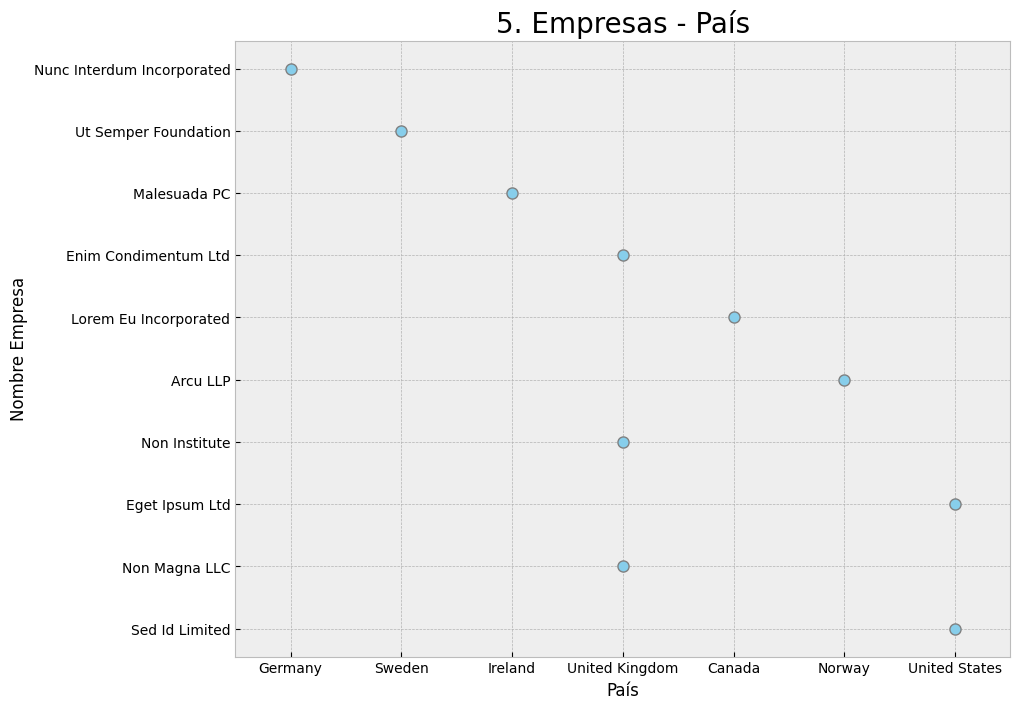

In [ ]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,8))

g = sns.swarmplot(data=top10_empresas,
            y='company_name',
            x='País',
            s= 8,
            color= 'skyblue',
            linewidth=1, 
            edgecolor='grey')


g.set_title('5. Empresas - País', fontsize = 20)
g.set_xlabel('País')
g.set_ylabel('Nombre Empresa')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.grid(True)
  
plt.show()

<span style="color: blue; font-family: Verdana; font-size: 18px; font-weight: bold;">Ejercicio 6 - Nivel 1

Tres variables.

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Variables escogidas:

- País: variable categórica de la tabla unificada "transactions_companies"
- Company_name: variable categórica de la tabla unificada "transactions_companies"
- Importe: variable numérica de la tabla "transactions_companies" que contiene la suma de importe por países ordenado descendentemente

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Transformaciones:

No son necesarias transformaciones, uso el dataframe "top10_empresas"

<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">Visualización e interpretación del gráfico

Para visualizar estas 3 variables, he escogido un gráfico de barras en el que se puede ver, ordenado descendentemente, el importe acumulado de todas las transacciones por cada empresa, delimitando la información a las 10 empresas con mayor importe.

Además, cada barra está identificada con el color del país donde se ubica. El color está especificado en la leyenda del gráfico.

La empresa Nunc Interdum Incorporated ubicada en Alemania es la que cuenta con el mayor importe de este top 10, seguida de 5 empresas ubicadas en 5 países diferentes que tienen un importe parecido entre los 16 y 14k/$. 

En US y UK se encuentran las 3 empresas con peor resutado de este listado con unos importes de aproximadamente 900$ por empresa.

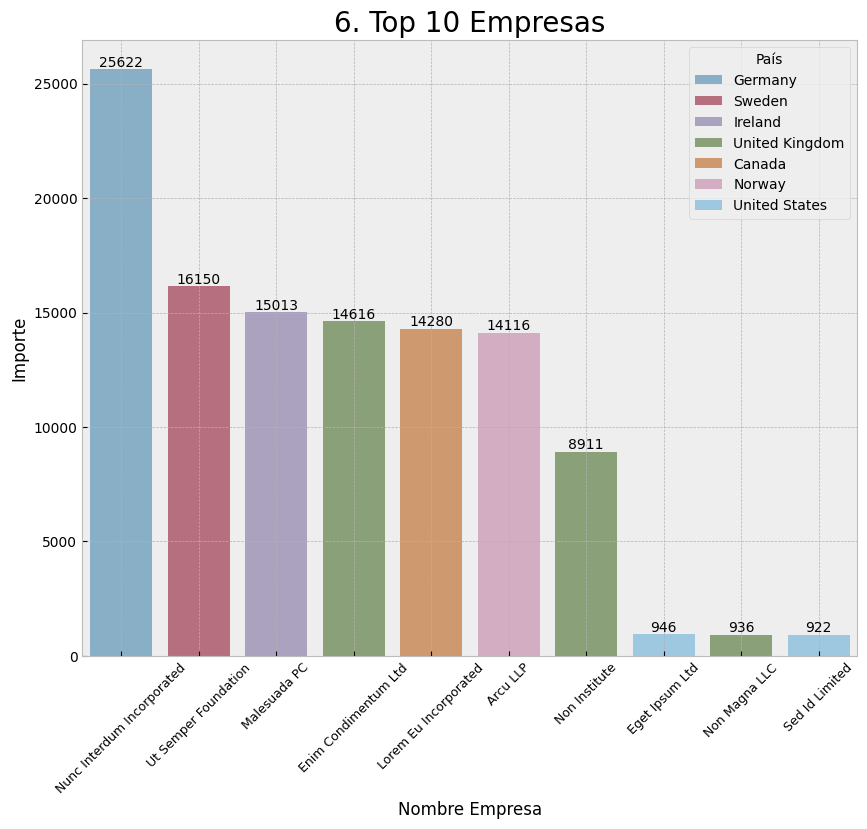

In [26]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,8))

g = sns.barplot(data=top10_empresas, 
                x='company_name', 
                y='Importe', 
                hue='País',
                alpha=.6)   
    


plt.title('6. Top 10 Empresas', fontsize = 20)
plt.xlabel('Nombre Empresa')
plt.ylabel('Importe')  
plt.yticks(fontsize=10)
plt.xticks(fontsize=9, rotation=45)
plt.grid(True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    
plt.show()

<span style="color: blue; font-family: Verdana; font-size: 18px; font-weight: bold;">Ejercicio 7 - Nivel 1

Graficar un pairplot.

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Variables escogidas:

- País
- Total_Importe: Suma del total de transacciones por páis
- Total_Transacciones: Conteo el número de transacciones por país
- Total_Empresas: Conteo del número de empresas por país

<span style="color: skyblue; font-family: Verdana; font-size: 16px">Transformaciones:

1. Creo dataframe "info_pais" a partir de "transactions_companies"

In [27]:
info_pais = pd.DataFrame(transactions_companies, columns=['País', 'Importe', 'Empresa', 'company_name','id'])

info_pais.rename(columns={'id': 'id_transaccion'}, inplace=True)

info_pais = pd.DataFrame(info_pais.groupby('País').agg(
    Total_Importe=('Importe', 'sum'),
    Nº_Transacciones=('id_transaccion', 'count'),
    Nº_Empresas=('Empresa', 'nunique')).reset_index())

info_pais

,País,Total_Importe,No_Transacciones,No_Empresas
0,Australia,2784.63,12,6
1,Belgium,2965.92,13,8
2,Canada,16448.52,61,5
3,China,682.67,3,2
4,France,1075.19,6,3
5,Germany,28815.98,118,8
6,Ireland,17193.12,62,6
7,Italy,3427.03,17,9
8,Netherlands,4554.32,18,10
9,New Zealand,2445.05,11,6


<span style="color: skyblue; font-family: Verdana; font-size: 16px; font-weight: bold;">Visualización e interpretación del gráfico

El siguiente paiplot analiza las relaciones entre todos los pares posibles de las variables numéricas de la tabla "info_pais":

- Relación entre Total_Importe y Nº_Transacciones: En el gráfico parece haber una fuerte correlación positiva ya una línea de regresión está bien definida. Esto indica que hay una relación directa entre el número de transacciones y el importe total por paises. A más transacciones, mayor es el importe acumulado por país.
- Relación entre Total_Importe y Nº_Empresas: La relación parece ser más débil, con una mayor dispersión de puntos. No se puede confirmar que exista un mayor importe de transacciones en aquellos países que cuentan con mayor número de empresas.
- Relación entre No_Transacciones y Nº_Empresas: En la última relación, también aparece una correlación positiva pero más moderada que la primera relación. Podríamos decir que a mayor número de mepresas en un país, el número de transacciones realizadas es ligeramente mayor.

En diagonal, se pueden ver los gráficos de densidad de cada variable individual los cuales indican:

- Total_Importe: en el análisis de los importes por país, se aprecia un pico entre los 15 y 25k/€ aproximadamente, lo cuál indica que la mayoría de los importes se concentran en este rango.
- Nº_Transacciones: en cuanto a las transacciones, podemos ver que existe otro rango donde se concentra el mayor número de transacciones por país que está situado entre las 65 - 100 transacciones aproximadamente.
- Nº_Empresas: en este gráfico se puede ver el número de empresas ubicadas en cada país siendo el rango entre 8 y 12 el más pronunciado en la distribución de los datos.










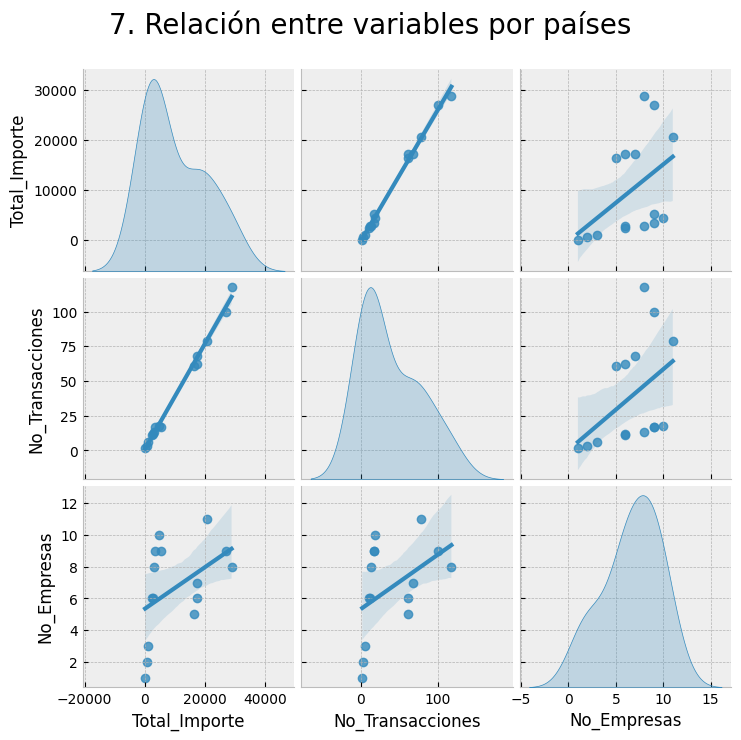

In [28]:
import seaborn as sns
import matplotlib.pyplot

g = sns.pairplot(info_pais, diag_kind='kde', kind='reg')

g = plt.subplots_adjust(top=0.9)  
g = plt.suptitle('7. Relación entre variables por países', 
                      fontsize=20, ha='center')

plt.show()